Loading The Dataset

In [2]:
import pandas as pd
df=pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Importing Necessary packages

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Summary Of The Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.shape

(200, 5)

The Dataset has 200 Records (or rows) and 5 columns.

In [6]:
#Dropping unnecessary column in the dataset
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [7]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
#Descriptive Summary Of the Dataset
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Checking For Missing Values In The Dataset

In [9]:
df.isnull()

,TV,radio,newspaper,sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [10]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

There are no missing values present in the dataset

In [11]:
#Checking for duplicate records in the dataset
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [12]:
df.duplicated().sum()

np.int64(0)

Hence, there are no duplicated records in the dataset

Exploratory Data Analysis

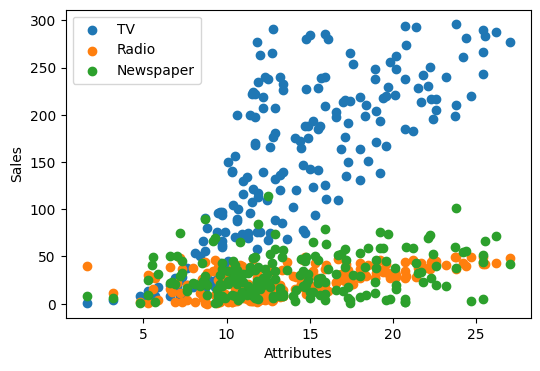

In [13]:
plt.figure(figsize=(6,4))
plt.scatter(df['sales'],df['TV'],label='TV')
plt.scatter(df['sales'],df['radio'],label='Radio')
plt.scatter(df['sales'],df['newspaper'],label='Newspaper')
plt.xlabel('Attributes')
plt.ylabel('Sales')
plt.legend()
plt.show()

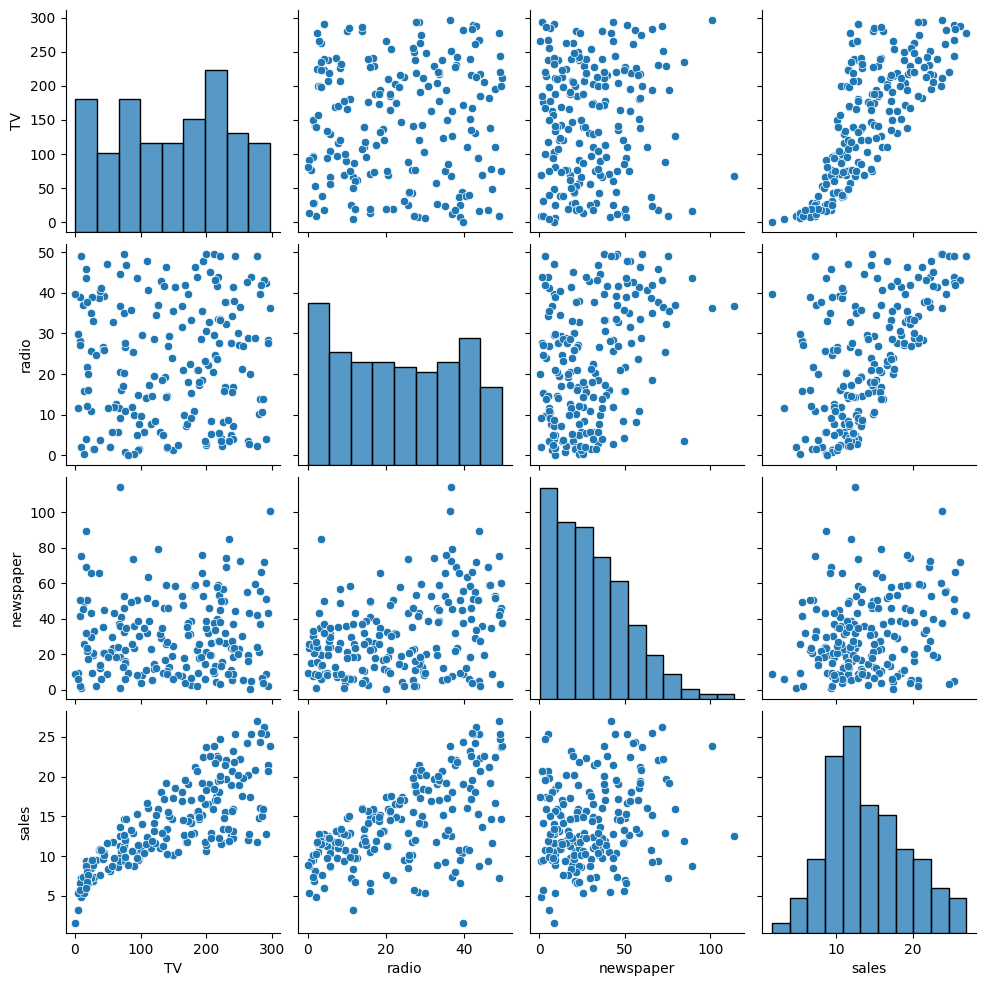

In [14]:
import seaborn as sns
sns.pairplot(df)

<Axes: xlabel='sales', ylabel='Density'>

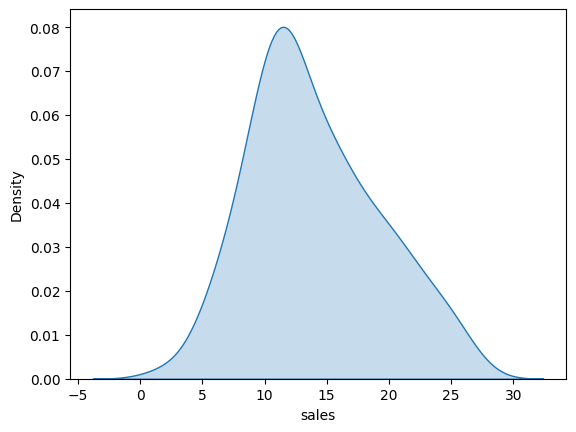

In [15]:
## KDE Plot
sns.kdeplot(df['sales'],fill=True)

<Axes: xlabel='sales', ylabel='Count'>

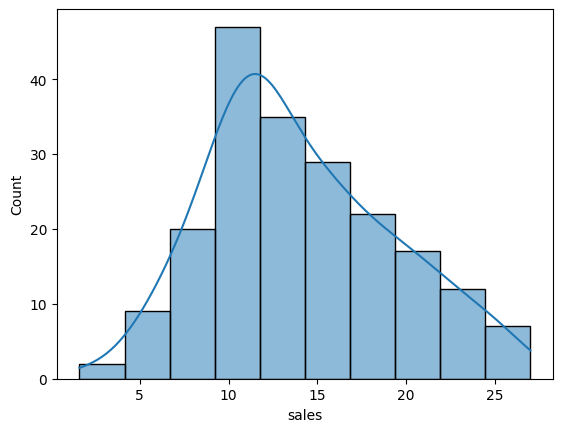

In [16]:
sns.histplot(df['sales'],bins=10,kde=True)

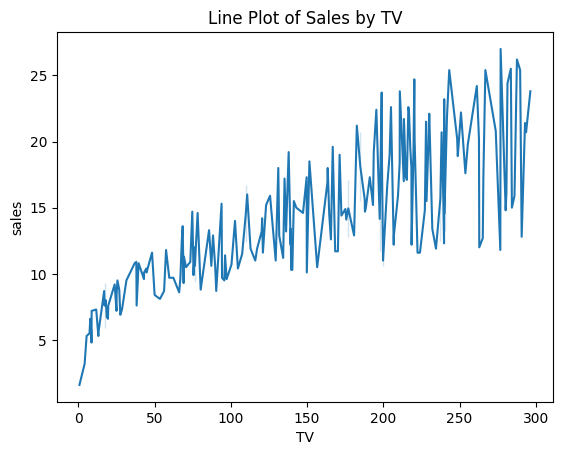

In [17]:
sns.lineplot(x='TV',y='sales',data=df)
plt.title("Line Plot of Sales by TV")
plt.show()

Checking For Multicollinearity

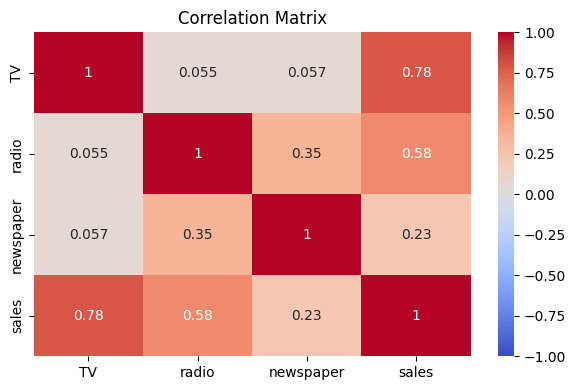

In [18]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [19]:
##Multicollinearity Checking
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
X = df[['TV', 'newspaper', 'radio']]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factor (VIF) for each feature:")
print(vif_data)

Variance Inflation Factor (VIF) for each feature:
     Feature       VIF
0         TV  2.486772
1  newspaper  3.055245
2      radio  3.285462


The Variance Inflation factor is very low for each and every attribute in the dataset.

In [20]:
##Independent And Dependent Features
X=df.drop(['sales'],axis=1)
y=df['sales']

In [21]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

Implementation of Multiple Linear Regression

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Print coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\
Model Coefficients:")
print(coefficients)

Model Performance:
Mean Squared Error: 2.880023730094191
R-squared Score: 0.8935163320163658
Model Coefficients:
     Feature  Coefficient
0         TV     0.045434
1      radio     0.191457
2  newspaper     0.002568


In [23]:
model.intercept_

np.float64(2.7783034602452865)

Hence, the Multiple Linear Regression equation is -
sales=0.45434(TV)+0.191457(TV)+0.002568(newspaper)+2.7783

Implementation Of Lasso Regression

Mean absolute error 1.3875302429453518
R2 Score 0.8951947205229303
Model Coefficients:
     Feature  Coefficient
0         TV     0.045328
1      radio     0.187637
2  newspaper     0.001282


np.float64(2.9233158021343844)

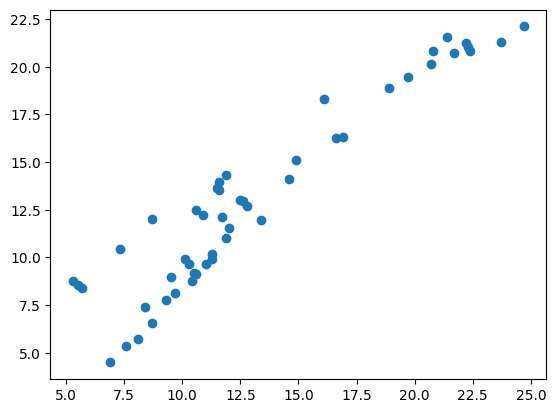

In [24]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
model_lasso=lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

# Print coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model_lasso.coef_})
print("\
Model Coefficients:")
print(coefficients)

model_lasso.intercept_

Hence, The Lasso Regression Equation is -
sales=2.923+0.045(TV)+0.1876(Radio)+0.0013(newspaper)

Implementation of Ridge Regression

Mean absolute error 1.4023136454046163
R2 Score 0.8935173307476478
Model Coefficients:
     Feature  Coefficient
0         TV     0.045434
1      radio     0.191450
2  newspaper     0.002570


np.float64(2.7784064591905846)

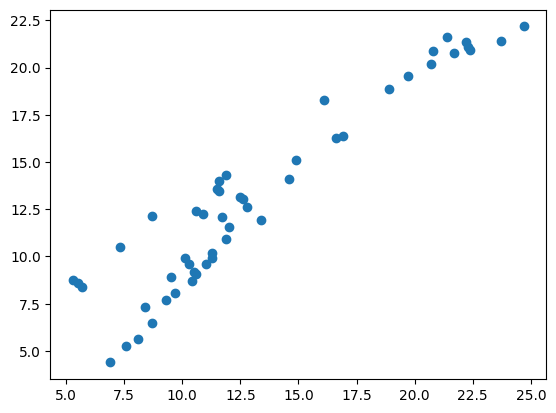

In [25]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
model_ridge=ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

# Print coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model_ridge.coef_})
print("\
Model Coefficients:")
print(coefficients)

model_ridge.intercept_

Hence, The Ridge Regression Equation is -
sales=2.778+0.045(TV)+0.1914(Radio)+0.0026(newspaper)

Implementation Of Elastic Net Regression

Mean absolute error 1.395009918538284
R2 Score 0.8944658510225635
Model Coefficients:
     Feature  Coefficient
0         TV     0.045381
1      radio     0.189046
2  newspaper     0.002060


np.float64(2.8584357920261123)

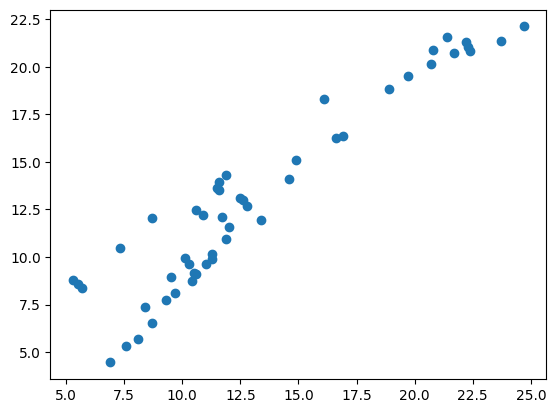

In [26]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
model_elastic=elastic.fit(X_train,y_train)
y_pred=elastic.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

# Print coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model_elastic.coef_})
print("\
Model Coefficients:")
print(coefficients)

model_elastic.intercept_

Hence, The Elastic Net Regression Equation is -
sales=2.858+0.045(TV)+0.1890(Radio)+0.0021(newspaper)